## TODO

biblioteca pycocotools
* validação com pycocotools
* Encontrando materiais uteis sobre a ferramenta, coletar os links para fazer uma documentação


* Colocar o campo Sproud


In [2]:
import json
from PIL import Image

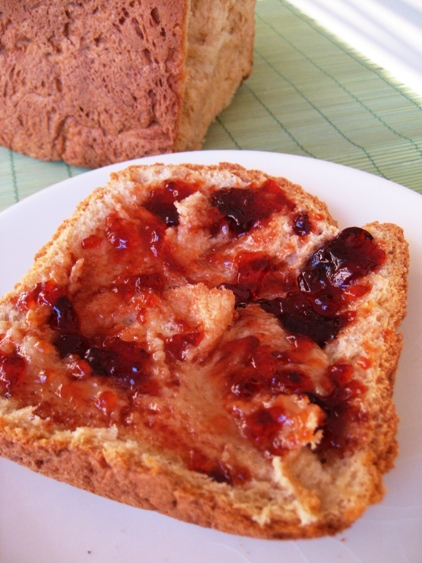

In [102]:
# Abrindo a imagem
bread_jam = "imagem_pao_com_geleia/pao_com_geleia.png"
image = Image.open(bread_jam)
image

In [103]:
# Imprimindo o valor da largura da imagem
image_width = image.size[0]
print(f"Largura da imagem: {image_width}px")

Largura da imagem: 422px


In [104]:
# Imprimindo o valor da altura da imagem
image_heigh = image.size[1]
print(f"Comprimento da imagem: {image_heigh}px")

Comprimento da imagem: 563px


In [105]:
# Abrindo e salvando em uma variável os dados do JSON

#json_file_path = "project-20-at-2022-11-24-16-10-16d9a976.json"
json_file_path = 'project-22-at-2022-12-05-16-23-de7b066b.json'

with open(json_file_path, 'r') as file:
     contents = json.loads(file.read())

In [106]:
contents

[{'id': 187775,
  'annotations': [{'id': 148595,
    'completed_by': 6,
    'result': [{'id': 'g160ftfKYG',
      'type': 'polygonlabels',
      'value': {'points': [[12.168874172185431, 85.09316770186338],
        [15.811258278145695, 85.09316770186338],
        [21.026490066225165, 83.85093167701864],
        [23.509933774834437, 81.98757763975155],
        [24.668874172185436, 79.75155279503106],
        [25.41390728476821, 75.0310559006211],
        [25.74503311258278, 72.79503105590062],
        [28.394039735099337, 71.42857142857143],
        [30.29801324503311, 69.81366459627331],
        [31.20860927152318, 65.59006211180125],
        [30.629139072847682, 60.372670807453424],
        [28.89072847682119, 57.01863354037268],
        [26.986754966887418, 54.6583850931677],
        [25, 55.03105590062112],
        [24.25496688741722, 52.298136645962735],
        [22.764900662251655, 47.82608695652174],
        [21.440397350993383, 45.714285714285715],
        [19.205298013245034, 4

In [107]:
contents[0].get('id')

187775

In [108]:
# id da imagem
id = contents[0]["id"]
id

187775

In [109]:
# Categoria
category = contents[0]['annotations'][0]['result'][0]['value']['polygonlabels'][0]

In [110]:
# Imprimindo o nome do arquivo
file_name = contents[0]["data"]['image'].split('/')[-1]
file_name

'azeitona_45.jpg'

In [111]:
# Extraindo a largura da imagem do arquivo JSON
width_from_json = contents[0]["annotations"][0]["result"][0]["original_width"]
print(f"Largura da imagem no arquivo JSON: {width_from_json}px")

# Extraindo a altura da imagem do arquivo JSON
height_from_json = contents[0]["annotations"][0]["result"][0]["original_height"]
print(f"Comprimento da imagem no arquivo JSON: {height_from_json}px")


area_image = width_from_json * height_from_json

Largura da imagem no arquivo JSON: 1920px
Comprimento da imagem no arquivo JSON: 1280px


In [112]:
# Extraindo os pontos da segmentação do arquivo JSON
polygon_segmentation_points = contents[0]["annotations"][0]["result"][0]["value"]["points"]
polygon_segmentation_points

[[12.168874172185431, 85.09316770186338],
 [15.811258278145695, 85.09316770186338],
 [21.026490066225165, 83.85093167701864],
 [23.509933774834437, 81.98757763975155],
 [24.668874172185436, 79.75155279503106],
 [25.41390728476821, 75.0310559006211],
 [25.74503311258278, 72.79503105590062],
 [28.394039735099337, 71.42857142857143],
 [30.29801324503311, 69.81366459627331],
 [31.20860927152318, 65.59006211180125],
 [30.629139072847682, 60.372670807453424],
 [28.89072847682119, 57.01863354037268],
 [26.986754966887418, 54.6583850931677],
 [25, 55.03105590062112],
 [24.25496688741722, 52.298136645962735],
 [22.764900662251655, 47.82608695652174],
 [21.440397350993383, 45.714285714285715],
 [19.205298013245034, 43.35403726708075],
 [18.046357615894042, 42.2360248447205],
 [17.466887417218544, 42.11180124223603],
 [16.63907284768212, 42.732919254658384],
 [15.562913907284765, 44.099378881987576],
 [15.149006622516556, 47.08074534161491],
 [14.735099337748345, 49.06832298136646],
 [14.56953642

In [113]:
# Conversão das coordenadas x e y de porcentagem para pixel
pixels_coordenates = []

for index in range(len(polygon_segmentation_points)):
    
    x_pixel_coordinate = polygon_segmentation_points[index][0] * width_from_json / 100.0
    y_pixel_coordinate = polygon_segmentation_points[index][1] * height_from_json / 100.0

    pixels_coordenates.append([x_pixel_coordinate, y_pixel_coordinate])

pixels_coordenates

[[233.64238410596028, 1089.1925465838513],
 [303.57615894039736, 1089.1925465838513],
 [403.7086092715232, 1073.2919254658386],
 [451.39072847682115, 1049.4409937888197],
 [473.6423841059604, 1020.8198757763976],
 [487.94701986754967, 960.39751552795],
 [494.3046357615894, 931.776397515528],
 [545.1655629139073, 914.2857142857143],
 [581.7218543046357, 893.6149068322984],
 [599.205298013245, 839.5527950310559],
 [588.0794701986755, 772.7701863354039],
 [554.7019867549668, 729.8385093167703],
 [518.1456953642385, 699.6273291925467],
 [480.0, 704.3975155279503],
 [465.6953642384106, 669.416149068323],
 [437.0860927152318, 612.1739130434784],
 [411.6556291390729, 585.1428571428572],
 [368.7417218543046, 554.9316770186335],
 [346.49006622516555, 540.6211180124224],
 [335.364238410596, 539.0310559006211],
 [319.4701986754967, 546.9813664596273],
 [298.80794701986747, 564.472049689441],
 [290.86092715231786, 602.6335403726708],
 [282.9139072847682, 628.0745341614906],
 [279.73509933774835, 6

In [114]:
# Colocando as coordenadas x e y em uma só lista 
x_y_coordinates = []

for index in range(len(pixels_coordenates)):
    x_y_coordinates.append(pixels_coordenates[index][0])
    x_y_coordinates.append(pixels_coordenates[index][1])

x_y_coordinates

[233.64238410596028,
 1089.1925465838513,
 303.57615894039736,
 1089.1925465838513,
 403.7086092715232,
 1073.2919254658386,
 451.39072847682115,
 1049.4409937888197,
 473.6423841059604,
 1020.8198757763976,
 487.94701986754967,
 960.39751552795,
 494.3046357615894,
 931.776397515528,
 545.1655629139073,
 914.2857142857143,
 581.7218543046357,
 893.6149068322984,
 599.205298013245,
 839.5527950310559,
 588.0794701986755,
 772.7701863354039,
 554.7019867549668,
 729.8385093167703,
 518.1456953642385,
 699.6273291925467,
 480.0,
 704.3975155279503,
 465.6953642384106,
 669.416149068323,
 437.0860927152318,
 612.1739130434784,
 411.6556291390729,
 585.1428571428572,
 368.7417218543046,
 554.9316770186335,
 346.49006622516555,
 540.6211180124224,
 335.364238410596,
 539.0310559006211,
 319.4701986754967,
 546.9813664596273,
 298.80794701986747,
 564.472049689441,
 290.86092715231786,
 602.6335403726708,
 282.9139072847682,
 628.0745341614906,
 279.73509933774835,
 663.0559006211181,
 284.5

In [115]:
x_coordinates = []
y_coordinates = []

for index in range(len(pixels_coordenates)):

    x_coordinates.append(pixels_coordenates[index][0])
    y_coordinates.append(pixels_coordenates[index][1])

x_min, y_min, x_max, y_max = (min(x_coordinates), min(y_coordinates), max(x_coordinates), max(y_coordinates))
total_area_segmentation = (x_max - x_min) * (y_max - y_min)

total_area_segmentation

328785.251120892

$$A = \frac{1}{2} \sum_{i = 1}^{n}(x_{i} \cdot x_{x + 1} - x_{i + 1} \cdot y_{i})$$

In [116]:
# Calculo de área de polígonos irregulares - Método de Gauss

def irregular_polygon_calculation(pixels_coordenates):
    right_multiplication = []
    left_multiplication = []

    for index in range(len(pixels_coordenates)):

        if pixels_coordenates[index + 1][1] == pixels_coordenates[-1][1] or pixels_coordenates[index + 1][0] == pixels_coordenates[-1][0]:
            right_multiplication.append(pixels_coordenates[index][0] * pixels_coordenates[-1][1])
            left_multiplication.append(pixels_coordenates[-1][0] * pixels_coordenates[index][1])
            break
        else:
            right_multiplication.append(pixels_coordenates[index][0] * pixels_coordenates[index + 1][1])
            left_multiplication.append(pixels_coordenates[index + 1][0] * pixels_coordenates[index][1])

    right_multiplication.append(pixels_coordenates[-1][0] * pixels_coordenates[0][1])
    left_multiplication.append(pixels_coordenates[0][0] * pixels_coordenates[-1][1])

    total_polygon_area = (sum(right_multiplication) - sum(left_multiplication)) / 2

    return total_polygon_area

In [117]:
irregular_polygon_calculation(pixels_coordenates)

-245933.11669614818

In [118]:
right_multiplication = []
left_multiplication = []

for index in range(len(pixels_coordenates[:-1])):
    right_multiplication.append(pixels_coordenates[index][0] * pixels_coordenates[-1][1])
    left_multiplication.append(pixels_coordenates[-1][0] * pixels_coordenates[index][1])
    right_multiplication.append(pixels_coordenates[index][0] * pixels_coordenates[index + 1][1])
    left_multiplication.append(pixels_coordenates[index + 1][0] * pixels_coordenates[index][1])

total_polygon_area = (sum(right_multiplication) - sum(left_multiplication)) / 2
total_polygon_area

2592380.8251408786

In [119]:
# Conversão das coordenadas x e y do JSON de porcentagem para pixel
def convert_coordinate_percent_to_pixels(polygon_segmentation_points):
    
    pixels_coordenates = []
    
    for index in range(0, len(polygon_segmentation_points)):
        
        x_pixel_coordinate = polygon_segmentation_points[index][0] * width_from_json / 100.0
        y_pixel_coordinate = polygon_segmentation_points[index][1] * height_from_json / 100.0

        pixels_coordenates.append([x_pixel_coordinate, y_pixel_coordinate])

    return pixels_coordenates

In [120]:
# Colocando as coordenadas x e y em uma só lista
def organizing_coordenates(pixels_coordenates):
    x_y_coordinates = []

    for index in range(0, len(pixels_coordenates)):
        x_y_coordinates.append(pixels_coordenates[index][0])
        x_y_coordinates.append(pixels_coordenates[index][1])
        
    return x_y_coordinates

In [121]:
# Cálculando a área do bounding box
def total_area_bounding_box(pixels_coordenates):
    x_coordinates = []
    y_coordinates = []
    result = []

    for index in range(len(pixels_coordenates)):

        x_coordinates.append(pixels_coordenates[index][0])
        y_coordinates.append(pixels_coordenates[index][1])

    x_min, y_min, x_max, y_max = (min(x_coordinates), min(y_coordinates), max(x_coordinates), max(y_coordinates))
    area_segmentation = (x_max - x_min) * (y_max - y_min)
    result.append([x_min, y_min, x_max, y_max, area_segmentation])
    
    return result

In [122]:
total_area_bbox = total_area_bounding_box(pixels_coordenates)
total_area_bbox[0][0:-1]

[1.5894039735099341, 539.0310559006211, 599.205298013245, 1089.1925465838513]

In [123]:
total_area_bbox[0][-1]

328785.251120892

In [124]:
len(contents)

121

In [125]:
coco_format = {}
images = {}
categories = {}
annotations = {}
bbox = {}
area = {}

# O valor da largura da imagem
width_from_json = contents[0]["annotations"][0]["result"][0]["original_width"]

# Extraindo a altura da imagem do arquivo JSON
height_from_json = contents[0]["annotations"][0]["result"][0]["original_height"]

# id
id = contents[0]["id"]

# nome do arquivo imagem
image_json_name = contents[0]["data"]['image'].split('/')[-1]

# Categoria
category = contents[0]['annotations'][0]['result'][0]['value']['polygonlabels'][0]

# Pontos da segmentação do arquivo JSON
polygon_segmentation_points = contents[0]["annotations"][0]["result"][0]["value"]["points"]

# Conversão das coordenadas x e y do JSON de porcentagem para pixel
pixels_coordenates = convert_coordinate_percent_to_pixels(polygon_segmentation_points)

# Organizando as coordenadas x e y para uma lista  
organized_pixels_coordenates = organizing_coordenates(pixels_coordenates)

# Coordenadas do bbox
total_area_bbox = total_area_bounding_box(pixels_coordenates)

# Calculo da área da bbox
total_area_bbox = total_area_bounding_box(pixels_coordenates)

# Formatando para COCO e salvando em JSON
images["width"] = width_from_json
images["height"] = height_from_json
images["id"] = id
images["file_name"] = image_json_name

categories["id"] = "loop index"
categories["name"] = category

annotations["id"] = "loop index"
annotations["image_id"] = id
annotations["category_id"] = category
annotations["segmentation"] = organized_pixels_coordenates
annotations["bbox"] = total_area_bbox[0][0:-1]
annotations["area"] = total_area_bbox[0][-1]


coco_format["images"] = images
coco_format["categories"] = categories
coco_format["annotations"] = annotations

data = {"imagens": images, "categories": categories, "annotations": annotations}



In [126]:
data

{'imagens': {'width': 1920,
  'height': 1280,
  'id': 187775,
  'file_name': 'azeitona_45.jpg'},
 'categories': {'id': 'loop index', 'name': 'Azeitona'},
 'annotations': {'id': 'loop index',
  'image_id': 187775,
  'category_id': 'Azeitona',
  'segmentation': [233.64238410596028,
   1089.1925465838513,
   303.57615894039736,
   1089.1925465838513,
   403.7086092715232,
   1073.2919254658386,
   451.39072847682115,
   1049.4409937888197,
   473.6423841059604,
   1020.8198757763976,
   487.94701986754967,
   960.39751552795,
   494.3046357615894,
   931.776397515528,
   545.1655629139073,
   914.2857142857143,
   581.7218543046357,
   893.6149068322984,
   599.205298013245,
   839.5527950310559,
   588.0794701986755,
   772.7701863354039,
   554.7019867549668,
   729.8385093167703,
   518.1456953642385,
   699.6273291925467,
   480.0,
   704.3975155279503,
   465.6953642384106,
   669.416149068323,
   437.0860927152318,
   612.1739130434784,
   411.6556291390729,
   585.1428571428572,
  

In [127]:
category = contents[0]['annotations'][0]['result'][0]['value']
category

{'points': [[12.168874172185431, 85.09316770186338],
  [15.811258278145695, 85.09316770186338],
  [21.026490066225165, 83.85093167701864],
  [23.509933774834437, 81.98757763975155],
  [24.668874172185436, 79.75155279503106],
  [25.41390728476821, 75.0310559006211],
  [25.74503311258278, 72.79503105590062],
  [28.394039735099337, 71.42857142857143],
  [30.29801324503311, 69.81366459627331],
  [31.20860927152318, 65.59006211180125],
  [30.629139072847682, 60.372670807453424],
  [28.89072847682119, 57.01863354037268],
  [26.986754966887418, 54.6583850931677],
  [25, 55.03105590062112],
  [24.25496688741722, 52.298136645962735],
  [22.764900662251655, 47.82608695652174],
  [21.440397350993383, 45.714285714285715],
  [19.205298013245034, 43.35403726708075],
  [18.046357615894042, 42.2360248447205],
  [17.466887417218544, 42.11180124223603],
  [16.63907284768212, 42.732919254658384],
  [15.562913907284765, 44.099378881987576],
  [15.149006622516556, 47.08074534161491],
  [14.735099337748345,

In [128]:
data

{'imagens': {'width': 1920,
  'height': 1280,
  'id': 187775,
  'file_name': 'azeitona_45.jpg'},
 'categories': {'id': 'loop index', 'name': 'Azeitona'},
 'annotations': {'id': 'loop index',
  'image_id': 187775,
  'category_id': 'Azeitona',
  'segmentation': [233.64238410596028,
   1089.1925465838513,
   303.57615894039736,
   1089.1925465838513,
   403.7086092715232,
   1073.2919254658386,
   451.39072847682115,
   1049.4409937888197,
   473.6423841059604,
   1020.8198757763976,
   487.94701986754967,
   960.39751552795,
   494.3046357615894,
   931.776397515528,
   545.1655629139073,
   914.2857142857143,
   581.7218543046357,
   893.6149068322984,
   599.205298013245,
   839.5527950310559,
   588.0794701986755,
   772.7701863354039,
   554.7019867549668,
   729.8385093167703,
   518.1456953642385,
   699.6273291925467,
   480.0,
   704.3975155279503,
   465.6953642384106,
   669.416149068323,
   437.0860927152318,
   612.1739130434784,
   411.6556291390729,
   585.1428571428572,
  

# Testando com mais de uma segmentação

In [129]:
contents[0]

{'id': 187775,
 'annotations': [{'id': 148595,
   'completed_by': 6,
   'result': [{'id': 'g160ftfKYG',
     'type': 'polygonlabels',
     'value': {'points': [[12.168874172185431, 85.09316770186338],
       [15.811258278145695, 85.09316770186338],
       [21.026490066225165, 83.85093167701864],
       [23.509933774834437, 81.98757763975155],
       [24.668874172185436, 79.75155279503106],
       [25.41390728476821, 75.0310559006211],
       [25.74503311258278, 72.79503105590062],
       [28.394039735099337, 71.42857142857143],
       [30.29801324503311, 69.81366459627331],
       [31.20860927152318, 65.59006211180125],
       [30.629139072847682, 60.372670807453424],
       [28.89072847682119, 57.01863354037268],
       [26.986754966887418, 54.6583850931677],
       [25, 55.03105590062112],
       [24.25496688741722, 52.298136645962735],
       [22.764900662251655, 47.82608695652174],
       [21.440397350993383, 45.714285714285715],
       [19.205298013245034, 43.35403726708075],
    

In [130]:
pixels_coordenates

[[233.64238410596028, 1089.1925465838513],
 [303.57615894039736, 1089.1925465838513],
 [403.7086092715232, 1073.2919254658386],
 [451.39072847682115, 1049.4409937888197],
 [473.6423841059604, 1020.8198757763976],
 [487.94701986754967, 960.39751552795],
 [494.3046357615894, 931.776397515528],
 [545.1655629139073, 914.2857142857143],
 [581.7218543046357, 893.6149068322984],
 [599.205298013245, 839.5527950310559],
 [588.0794701986755, 772.7701863354039],
 [554.7019867549668, 729.8385093167703],
 [518.1456953642385, 699.6273291925467],
 [480.0, 704.3975155279503],
 [465.6953642384106, 669.416149068323],
 [437.0860927152318, 612.1739130434784],
 [411.6556291390729, 585.1428571428572],
 [368.7417218543046, 554.9316770186335],
 [346.49006622516555, 540.6211180124224],
 [335.364238410596, 539.0310559006211],
 [319.4701986754967, 546.9813664596273],
 [298.80794701986747, 564.472049689441],
 [290.86092715231786, 602.6335403726708],
 [282.9139072847682, 628.0745341614906],
 [279.73509933774835, 6

In [131]:
def set_categories(categories):

    set_categories = []
    list_data = []

    for index in range(len(categories)):
        set_categories.append(categories[index]['name'])

    index_set = sorted(list(set(set_categories)))

    for index in range(len(index_set)):
        data = {'id': index, 'name': index_set[index]}  
        list_data.append(data)

    return list_data

In [132]:
# coco_json = json.loads(coco)
# for info in coco_json.get('images').get('width').get('height').get('id').get('file_name'):
#     if info.get('width').get('heith').get('id').get('file_name'):
#         info['width'] = width_from_json
#         info['height'] = height_from_json
#         info['id'] = image_id
#         info['file_name'] = image_json_name


In [133]:
pixels_coordenates[0]

[233.64238410596028, 1089.1925465838513]

In [134]:
images = []
#dimensions = []
categories = []
annotations = []
bbox = []
area = []

def filter_json(json_file_path):

    with open(json_file_path, 'r') as file:
        contents = json.loads(file.read())

        for index_annotation in range(len(contents)):
            
            # Variavél que possibilita checar se houve skip na anotação
            result = contents[index_annotation]['annotations'][0]['was_cancelled']

            # Checando se skip na anotação
            if result == False:

                # O valor da largura da imagem
                width_from_json = contents[index_annotation]["annotations"][0]["result"][0]["original_width"]

                # Extraindo a altura da imagem do arquivo JSON
                height_from_json = contents[index_annotation]["annotations"][0]["result"][0]["original_height"]

                # id da imagem
                image_id = contents[index_annotation]["id"]

                # nome do arquivo imagem
                image_json_name = contents[index_annotation]["data"]['image']

                # Categoria
                category = contents[index_annotation]['annotations'][0]['result'][0]['value']['polygonlabels'][0]

                # Pontos da segmentação do arquivo JSON
                polygon_segmentation_points = contents[index_annotation]["annotations"][0]["result"][0]["value"]["points"]

                images.append(
                {
                    "width": width_from_json, "height": height_from_json, "id": index_annotation, "file_name": image_json_name
                }
            )

            categories.append(category)

    print(categories)

In [42]:
import json
class JsonFilter:

    def __init__(self, json_file_path):

        self.images         = []
        self.segmentation_x = []
        self.segmentation_y = []
        self.segmentation   = []
        self.bbox_result    = []
        self.categories     = []
        self.annotations    = []
        self.list_data      = []
        self.list_categories = []

        with open(json_file_path, 'r') as file:

            contents = json.loads(file.read())

            for index_annotation in range(len(contents)):

                # Variavél que possibilita checar se houve skip na anotação
                result = contents[index_annotation]['annotations'][0]['was_cancelled']

                # Checando se skip na anotação
                if result == False:

                    # O valor da largura da imagem
                    self.width_from_json = contents[index_annotation]["annotations"][0]["result"][0]["original_width"]

                    # Extraindo a altura da imagem do arquivo JSON
                    self.height_from_json = contents[index_annotation]["annotations"][0]["result"][0]["original_height"]

                    # id da imagem
                    self.image_id = contents[index_annotation]["id"]

                    # nome do arquivo imagem
                    image_json_name = contents[index_annotation]["data"]['image']

                    # Categoria
                    category = contents[index_annotation]['annotations'][0]['result'][0]['value']['polygonlabels'][0]

                    # Pontos da segmentação do arquivo JSON
                    self.polygon_segmentation_points = contents[index_annotation]["annotations"][0]["result"][0]["value"]["points"]
                    
                    self.images.append(
                        {
                            "width": self.width_from_json, "height":  self.height_from_json, "id": index_annotation, "file_name": image_json_name
                        })

                    self.categories.append(category)


    # Conversão das coordenadas x e y do JSON de porcentagem para pixel
    def convert_coordinate_percent_to_pixels(self):

        for index in range(0, len(self.polygon_segmentation_points)):

            x_pixel_coordinate = self.polygon_segmentation_points[index][0] * self.width_from_json / 100.0
            y_pixel_coordinate = self.polygon_segmentation_points[index][1] * self.height_from_json / 100.0

            self.segmentation_x.append(x_pixel_coordinate)
            self.segmentation_y.append(y_pixel_coordinate)
            self.segmentation.append(x_pixel_coordinate)
            self.segmentation.append(y_pixel_coordinate)

        # Calculando a área do bbox
        x_min, y_min, x_max, y_max = (min(self.segmentation_x), min(self.segmentation_y), max(self.segmentation_x), max(self.segmentation_y))
        area_segmentation = (x_max - x_min) * (y_max - y_min)
        self.bbox_result.append([x_min, y_min, x_max, y_max, area_segmentation])

        self.annotations.append(
            {
                "id": index,
                "image_id": self.image_id,
                # "category_id": index_annotation,
                "segmentation": self.segmentation,
                "bbox": self.bbox_result[0][0:-1],
                "area": self.bbox_result[0][-1]
            })

        return self.annotations

    def set_categories(self):
        self.list_set_categories = []

        for index in range(0, len(self.categories)):
            self.list_set_categories.append(self.categories[index])
            #print(self.categories[index])

        index_set = sorted(list(set(self.list_set_categories)))
        #print(index_set)
        for index in range(0, len(index_set)):
            data = {'id': index, 'name': index_set[index]}  
            self.list_data.append(data)

        for id_index in range(len(self.categories)):
            if self.categories[id_index] in index_set:
                self.list_categories.append({"id": index_set.index(self.categories[id_index]),\
                                     "name": self.list_data[index_set.index(self.categories[id_index])]['name']})
        
        return self.list_categories



    # def saving_json(self):

    #     with open(f"coco_format_files/coco_file.json", "w") as out_file:
    #                 json.dump(self.list_data, out_file, ensure_ascii=False, indent=4)


ftr = JsonFilter('coco_food_train_2017/project-19-at-2022-12-27-15-35-cc6833ff.json')

In [2]:
ftr.convert_coordinate_percent_to_pixels()

[{'id': 19,
  'image_id': 170566,
  'segmentation': [71.19,
   327.9100000000001,
   5.39,
   371.06,
   0.0,
   371.06,
   0.0,
   473.53,
   365.66,
   473.53,
   379.69,
   442.25,
   354.88,
   431.46,
   247.01,
   417.44,
   232.99,
   410.97,
   277.21,
   406.65,
   326.83,
   408.81,
   379.69,
   416.36,
   386.16,
   418.52,
   393.71,
   413.12000000000006,
   406.65,
   379.69,
   406.65,
   366.74,
   399.1,
   339.78,
   286.92,
   323.6,
   179.06,
   318.20000000000005,
   98.16,
   316.04],
  'bbox': [0.0, 316.04, 406.65, 473.53],
  'area': 64043.30849999998}]

In [43]:
ftr.set_categories()

[{'id': 4, 'name': 'carrot'},
 {'id': 2, 'name': 'broccoli'},
 {'id': 1, 'name': 'banana'},
 {'id': 4, 'name': 'carrot'},
 {'id': 9, 'name': 'sandwich'},
 {'id': 4, 'name': 'carrot'},
 {'id': 9, 'name': 'sandwich'},
 {'id': 9, 'name': 'sandwich'},
 {'id': 0, 'name': 'apple'},
 {'id': 1, 'name': 'banana'},
 {'id': 8, 'name': 'pizza'},
 {'id': 8, 'name': 'pizza'},
 {'id': 8, 'name': 'pizza'},
 {'id': 8, 'name': 'pizza'},
 {'id': 8, 'name': 'pizza'},
 {'id': 8, 'name': 'pizza'},
 {'id': 8, 'name': 'pizza'},
 {'id': 8, 'name': 'pizza'},
 {'id': 8, 'name': 'pizza'},
 {'id': 8, 'name': 'pizza'},
 {'id': 8, 'name': 'pizza'},
 {'id': 8, 'name': 'pizza'},
 {'id': 8, 'name': 'pizza'},
 {'id': 8, 'name': 'pizza'},
 {'id': 8, 'name': 'pizza'},
 {'id': 3, 'name': 'cake'},
 {'id': 8, 'name': 'pizza'},
 {'id': 3, 'name': 'cake'},
 {'id': 3, 'name': 'cake'},
 {'id': 3, 'name': 'cake'},
 {'id': 3, 'name': 'cake'},
 {'id': 3, 'name': 'cake'},
 {'id': 3, 'name': 'cake'},
 {'id': 3, 'name': 'cake'},
 {'id

In [11]:
ftr.set_categories()

[{'id': 0, 'name': 'apple'},
 {'id': 1, 'name': 'banana'},
 {'id': 2, 'name': 'broccoli'},
 {'id': 3, 'name': 'cake'},
 {'id': 4, 'name': 'carrot'},
 {'id': 5, 'name': 'donut'},
 {'id': 6, 'name': 'hot dog'},
 {'id': 7, 'name': 'orange'},
 {'id': 8, 'name': 'pizza'},
 {'id': 9, 'name': 'sandwich'}]

In [12]:
ftr.set_categories()[0]['id']

0

In [ ]:
# Conversão das coordenadas x e y do JSON de porcentagem para pixel
pixels_coordenates = convert_coordinate_percent_to_pixels(polygon_segmentation_points, width_from_json, height_from_json)

# Organizando as coordenadas x e y para uma lista  
organized_pixels_coordenates = organizing_coordenates(pixels_coordenates)

# Coordenadas do bbox
total_area_bbox = total_area_bounding_box(pixels_coordenates)

# Calculo da área de poligono irregular
#total_area_polygon = irregular_polygon_calculation(pixels_coordenates)

TypeError: convert_coordinate_percent_to_pixels() takes 1 positional argument but 3 were given

In [ ]:
'o' in 'Bruno'

True

In [ ]:
arr1 = [2,9,15,27,46,53,9,12,22,28,36,43,9,11,26,38,46,59,7,12,28,34,45,60,1,10,27,32,44,54,1,9,21,28,36]

In [ ]:
len(arr1)/15

2.3333333333333335

# COCO dataset

In [ ]:
from matplotlib import pyplot as plt
import matplotlib.patches as patches # For bounding boxes
from collections import defaultdict

plt.rcParams['figure.figsize'] = (10, 10)

In [ ]:
with open('annotations_trainval2017/annotations/instances_val2017.json', 'r') as j:
    coco_json_content = json.loads(j.read())

In [ ]:
coco_json_content.keys()

In [ ]:
coco_json_content['categories']

In [ ]:
coco_json_content['images']

In [ ]:
coco_json_content['annotations']

In [ ]:
image_name = 'train2017/train2017/000000430122.jpg'

img = Image.open(image_name)
fig, ax = plt.subplots()
ax.imshow(img)
plt.show()

## Get annotations for image
Get mapping images_id -> [annotation_objects]

And mapping category_id -> category_name

In [ ]:
image_ids_annotations = defaultdict(list)

path = 'annotations_trainval2017/annotations/instances_train2017.json'
file = open(path)
annotations = json.load(file)

In [ ]:
for annotation in annotations['annotations']:
    image_id = annotation['image_id']
    image_ids_annotations[image_id].append(annotation)

In [ ]:
category_id_to_name = dict()
for annotation in annotations['categories']:
    category_id_to_name[annotation['id']] = annotation['name']

## Select one image and show annotation

In [ ]:
image_name = 'train2017/train2017/000000000136.jpg'
image_id = int(image_name.split("/")[-1].split(".")[0])

img = Image.open(image_name)
fig, ax = plt.subplots()

image_annotations = image_ids_annotations[image_id]

for image_annotation in image_annotations:
    bbox = image_annotation['bbox']
    name = category_id_to_name[image_annotation['category_id']]

    x = float(bbox[0])
    y = float(bbox[1])
    w = float(bbox[2])
    h = float(bbox[3])

    plt.text(x+3, y-5, name, fontdict={'fontsize':18.0, 'fontweight':'medium', 'color':'white', 'backgroundcolor':'red'})
    bb = patches.Rectangle((x, y), w, h, linewidth=2, edgecolor='red', facecolor='none')
    ax.add_patch(bb)



ax.imshow(img)
plt.show()